Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  

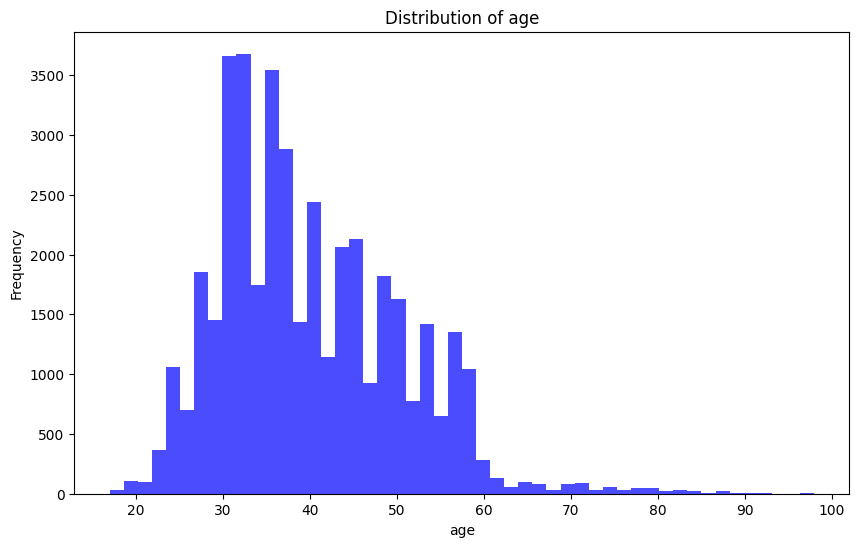

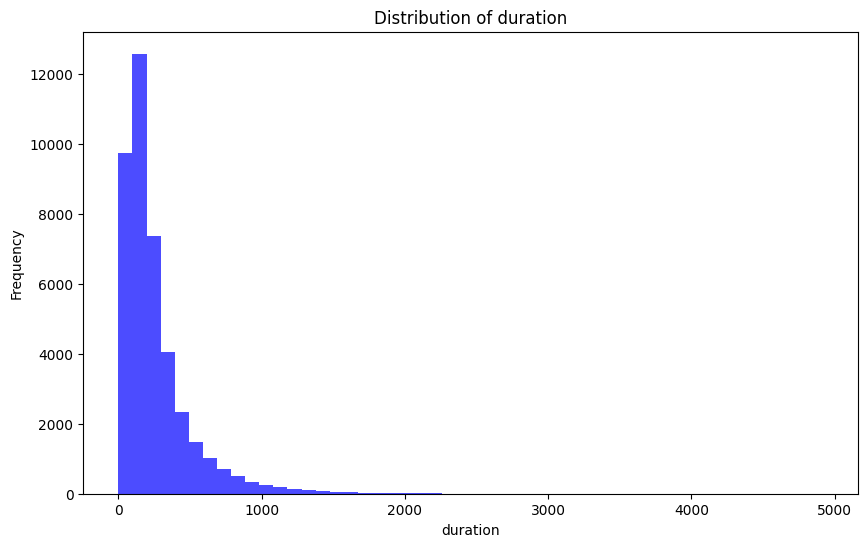

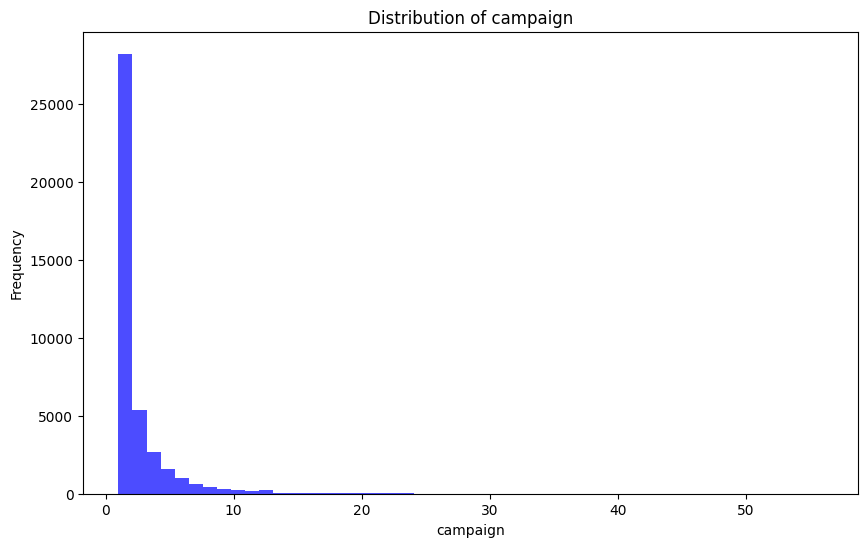

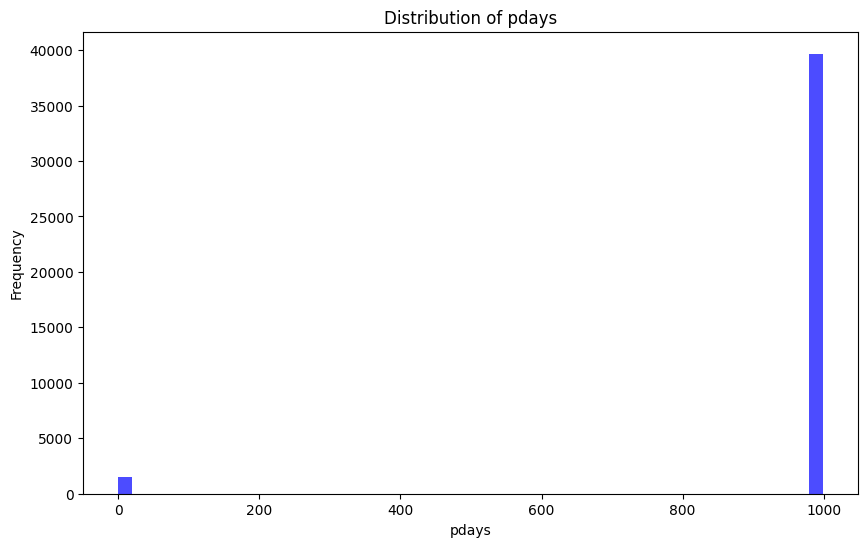

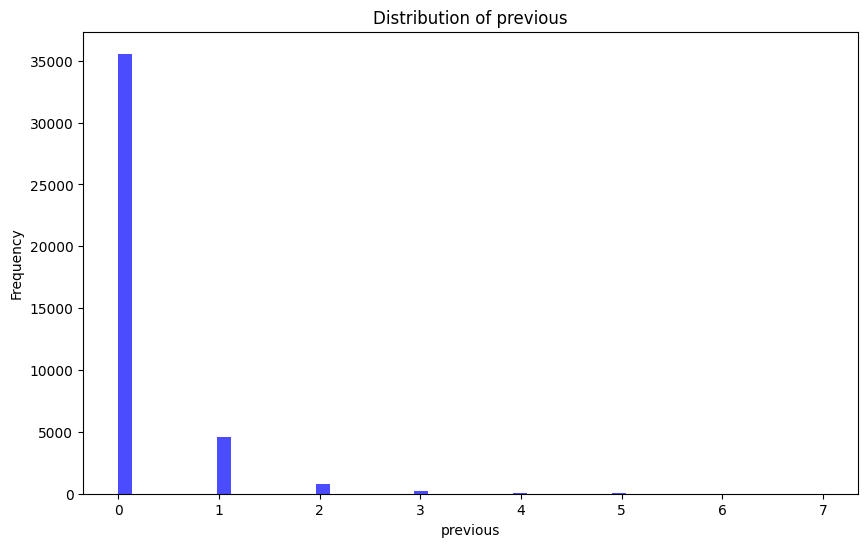

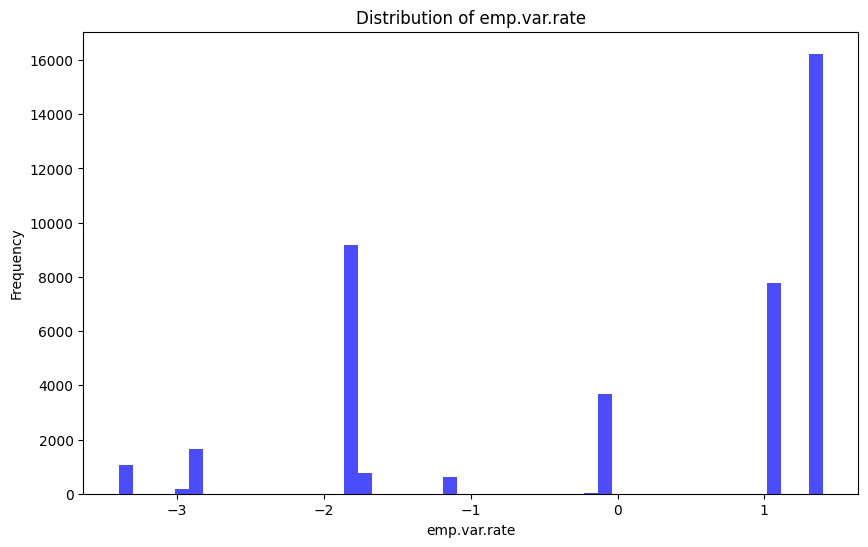

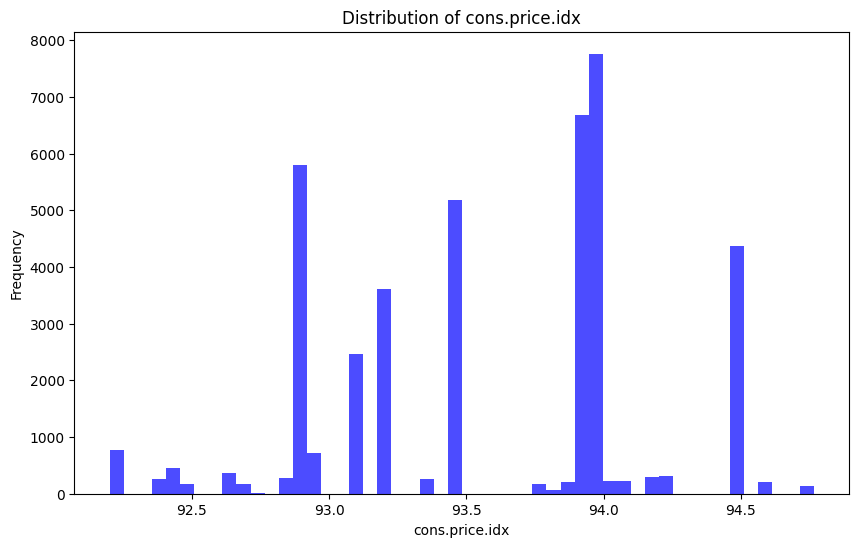

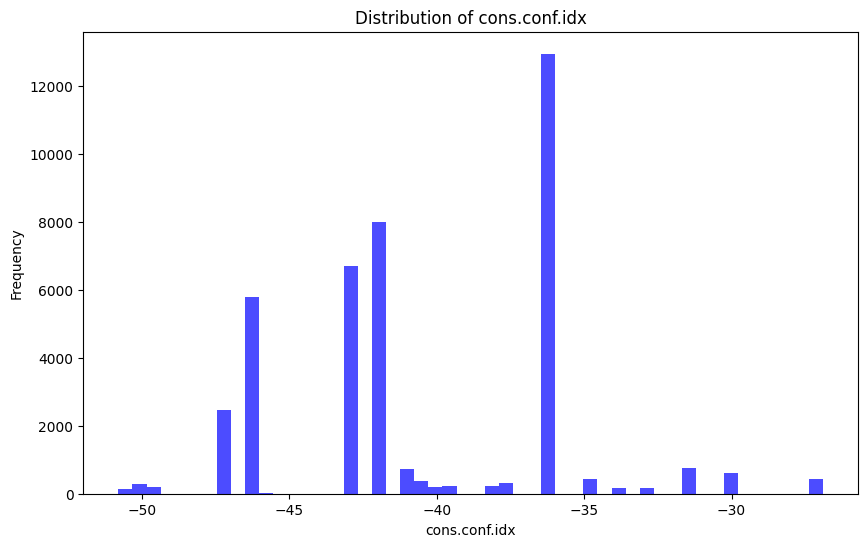

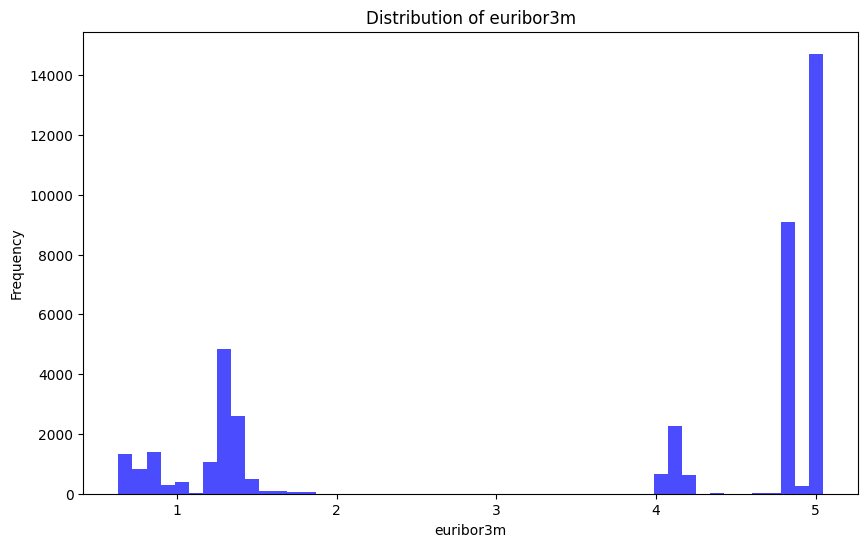

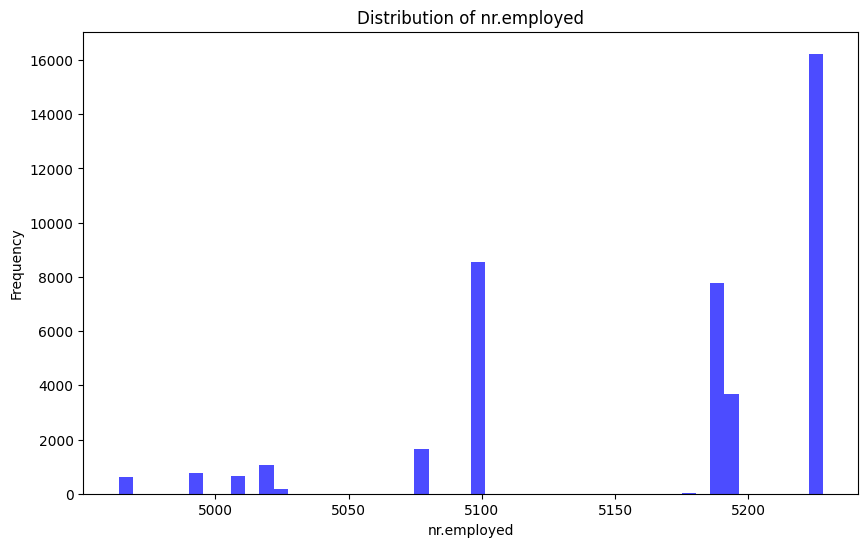

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

# Function to load the dataset from a URL
def load_dataset(url):
    return pd.read_csv(url, sep=';')

# Function to visualize the distribution of a feature
def plot_data_distribution(data, feature):
    plt.figure(figsize=(10, 6))
    plt.hist(data[feature], bins=50, color='blue', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

# Load the dataset
full_data = load_dataset('https://github.com/raccamateo/NEC_A2/raw/main/A2-bank/bank-additional-full.csv')

# Display the first few rows and a statistical summary for initial data inspection
print(full_data.head())
print(full_data.describe())

# Visualize the distribution of each numerical feature in the dataset
numerical_features = full_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for feature in numerical_features:
    plot_data_distribution(full_data, feature)

# Remove 'duration' from the features as it should not be included for a predictive model
full_data.drop('duration', axis=1, inplace=True)

# Convert 'pdays' into a binary feature indicating whether the client was previously contacted
full_data['previously_contacted'] = full_data['pdays'].apply(lambda x: 0 if x == 999 else 1)
full_data.drop('pdays', axis=1, inplace=True)  # Remove 'pdays' after transformation

# Define the features to be used for one-hot encoding and scaling
categorical_features = [
    'job', 'marital', 'education', 'default', 'housing', 'loan',
    'contact', 'month', 'day_of_week', 'poutcome', 'previously_contacted'
]
numerical_features = [
    'age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx',
    'cons.conf.idx', 'euribor3m', 'nr.employed'
]

# Set up the ColumnTransformer with a StandardScaler for numerical features and OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Apply the transformations to the features, excluding the target variable 'y'
X_transformed = preprocessor.fit_transform(full_data.drop('y', axis=1))

# Check if the transformed data is in a sparse format, if so, convert to dense
if hasattr(X_transformed, "toarray"):
    # If X_transformed is a sparse matrix, convert to a dense ndarray
    X_transformed = X_transformed.toarray()

# Retrieve feature names from the ColumnTransformer
feature_names = preprocessor.get_feature_names_out()

# Convert the transformed feature set into a DataFrame and save to CSV, excluding the target variable
preprocessed_df = pd.DataFrame(X_transformed, columns=feature_names)
preprocessed_df.to_csv("bank_preprocessed.csv", index=False)


In [4]:
preprocessed_df

,num__age,num__campaign,num__previous,num__emp.var.rate,num__cons.price.idx,num__cons.conf.idx,num__euribor3m,num__nr.employed,cat__job_admin.,cat__job_blue-collar,...,cat__day_of_week_fri,cat__day_of_week_mon,cat__day_of_week_thu,cat__day_of_week_tue,cat__day_of_week_wed,cat__poutcome_failure,cat__poutcome_nonexistent,cat__poutcome_success,cat__previously_contacted_0,cat__previously_contacted_1
0,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,-0.565922,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41184,0.573445,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41185,1.533034,-0.204909,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
41186,0.381527,-0.565922,-0.349494,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
